In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random

import imageio.v2 as imageio
import PIL
import scipy.ndimage as ndi
import PIL.Image
from collections import Counter

import tensorflow as tf
import keras
from keras import layers
from tensorflow.keras.utils import img_to_array, array_to_img, to_categorical

# Load Data

In [15]:
train_dir = '../Capstone-Three-CNN/data/Training/'
test_dir = '../Capstone-Three-CNN/data/Testing/'

In [16]:
train_paths_unshuffled = []
train_labels_unshuffled = []

test_paths_unshuffled = []
test_labels_unshuffled = []

for label in os.listdir(train_dir):
    for image in os.listdir(f'{train_dir}{label}'):
        train_paths_unshuffled.append(f'{train_dir}{label}/{image}')
        train_labels_unshuffled.append(label)
    for image in os.listdir(f'{test_dir}{label}'):
        test_paths_unshuffled.append(f'{test_dir}{label}/{image}')
        test_labels_unshuffled.append(label)

In [17]:
# function to confirm label percentages roughly equal in train/test set

def cat_percentages(label_list, length):
    counts = Counter(label_list)
    for label in np.unique(label_list):
        percent = round(counts[label] / len(label_list) * 100, 2)
        print(f'{label}: {percent}%')

In [18]:
print('Training label percentages: ')
cat_percentages(train_labels_unshuffled, len(train_labels_unshuffled))

print('Testing label percentages: ')
cat_percentages(test_labels_unshuffled, len(test_labels_unshuffled))

Training label percentages: 
glioma: 23.13%
meningioma: 23.44%
notumor: 27.92%
pituitary: 25.51%
Testing label percentages: 
glioma: 22.88%
meningioma: 23.34%
notumor: 30.89%
pituitary: 22.88%


*Train and test datasets are relatively balanced across categories.*

# Exploring the Data

Plot images, check sizes

In [19]:
def format_and_render_plot_legend():
    # get current fig
    fig = plt.gcf()
    for ax in fig.axes:
        ax.legend(loc='center right')
    plt.show()
    
def format_and_render_plot():
    # get current fig
    fig = plt.gcf()
    plt.tight_layout()
    plt.show()

Array shape:  (512, 512, 3)
Image type:  uint8
Min, max:  0 252
Array shape:  (512, 512, 3)
Image type:  uint8
Min, max:  0 255
Array shape:  (512, 512)
Image type:  uint8
Min, max:  0 253
Array shape:  (512, 512, 3)
Image type:  uint8
Min, max:  0 255
Array shape:  (512, 512, 3)
Image type:  uint8
Min, max:  0 255
Array shape:  (512, 512, 3)
Image type:  uint8
Min, max:  0 255
Array shape:  (512, 512)
Image type:  uint8
Min, max:  0 255
Array shape:  (236, 214, 3)
Image type:  uint8
Min, max:  0 255
Array shape:  (449, 359, 3)
Image type:  uint8
Min, max:  0 248
Array shape:  (781, 733, 3)
Image type:  uint8
Min, max:  0 255


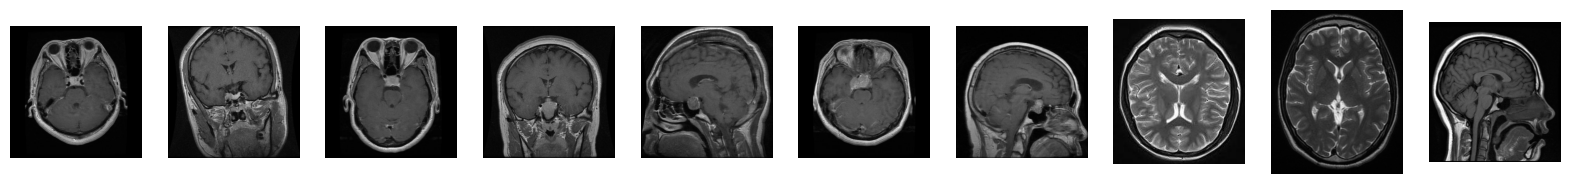

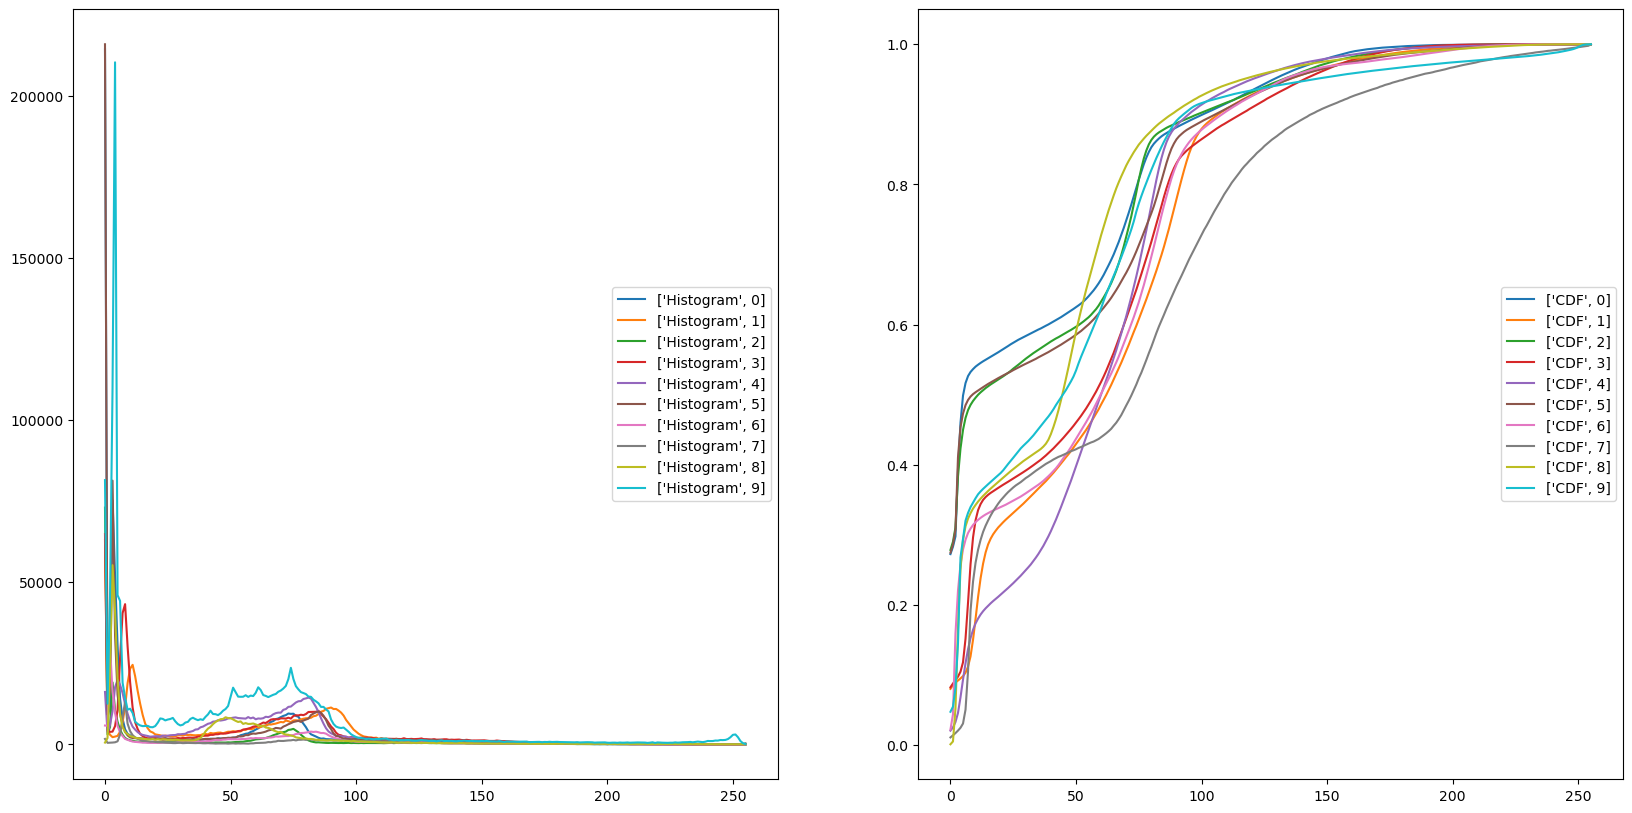

In [20]:
# print images (separated by 230)
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(20,10))
fig1, axes1 = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

for i in range(10):
    im = imageio.imread(train_paths_unshuffled[i*230])
    print('Array shape: ', im.shape)
    print('Image type: ', im.dtype)
    print('Min, max: ', im.min(), im.max())
    axes[i].imshow(im, cmap='gray')
    axes[i].axis('off')
    hist = ndi.histogram(im, min=0, max=255, bins=256)
    cdf = hist.cumsum() / hist.sum()
    axes1[0].plot(hist, label=['Histogram', i])
    axes1[1].plot(cdf, label=['CDF', i])
format_and_render_plot_legend()

*Dataset contains images with differing shape/intensity*

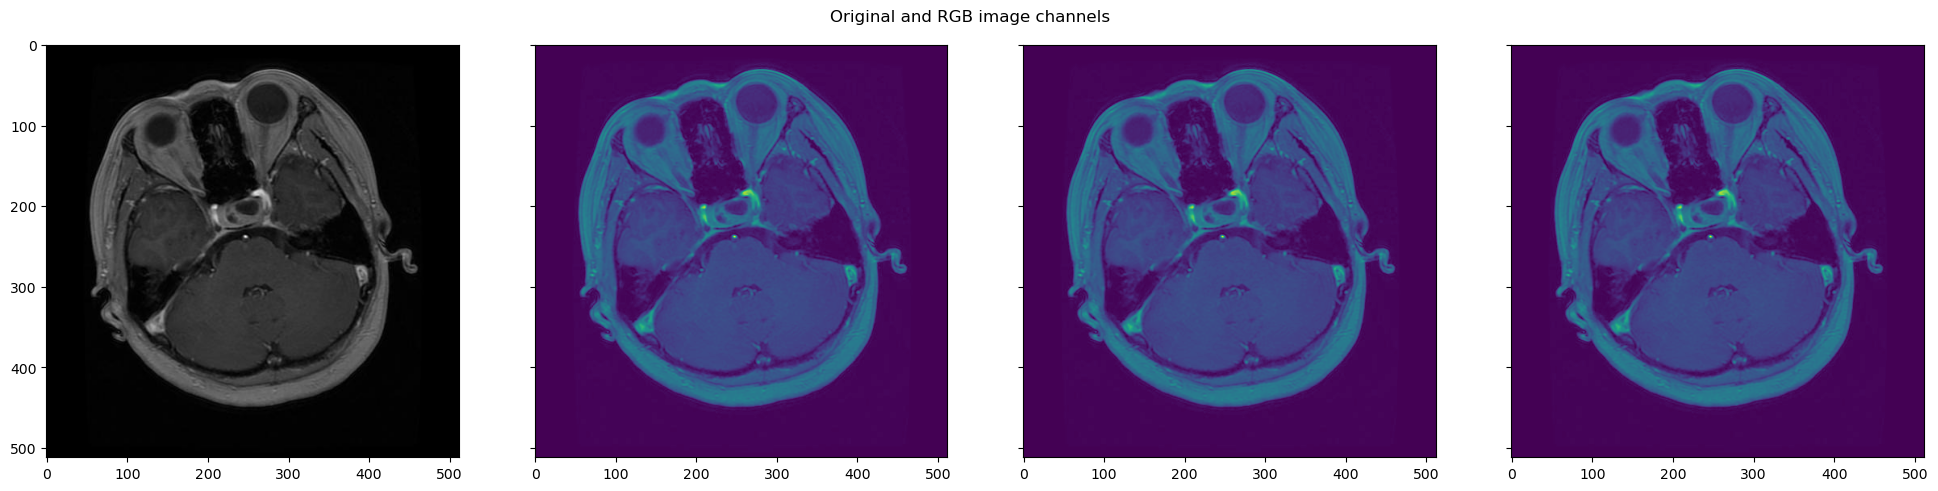

In [21]:
# plot original image and RGB channels separately
im = imageio.imread(train_paths_unshuffled[900]) 

fig, (im1, im2, im3, im4) = plt.subplots(1, 4, sharey=True)
fig.set_figwidth(20) 
im1.imshow(im)  # original image
im2.imshow(im[:, : , 0]) # red
im3.imshow(im[:, : , 1]) # green
im4.imshow(im[:, : , 2]) # blue
fig.suptitle('Original and RGB image channels')
format_and_render_plot()

In [22]:
im = im.astype('float32')
print(f'im min value: {im.min()}')
print(f'im max value: {im.max()}')

im min value: 0.0
im max value: 252.0


Many images are 'rbg' but have 3 identical RBG values and so appear grayscale. Converting to grayscale produces blue/green images.

Each of the 3 image channels alone are colored blue/green/yellow.

In [23]:
# create tensorflow dataset from local directory with keras

train_img_dataset, val_im_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir, labels='inferred', label_mode='int', class_names=['glioma', 'meningioma', 'notumor', 'pituitary'], 
    color_mode='grayscale', # color_mode 'grayscale' produces color images instead of gray
    batch_size=32, image_size=(224,224), shuffle=True, seed=42, validation_split=0.1, subset='both', 
    interpolation='nearest', crop_to_aspect_ratio=True)

# size may need to be 224,224 for VGG

Found 5712 files belonging to 4 classes.
Using 5141 files for training.
Using 571 files for validation.


In [24]:
len(train_img_dataset)

161

In [30]:
train_img_dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# Preprocessing

Assess, normalize, transform

dtype: float32
Arr shape after transform: (224, 224, 1)


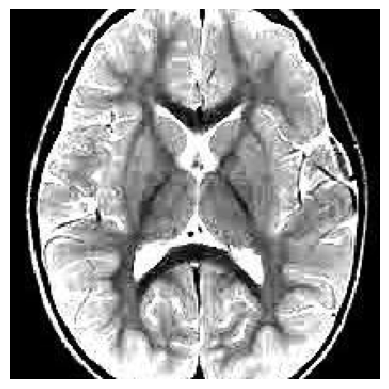

dtype: float32
Arr shape after transform: (224, 224, 1)


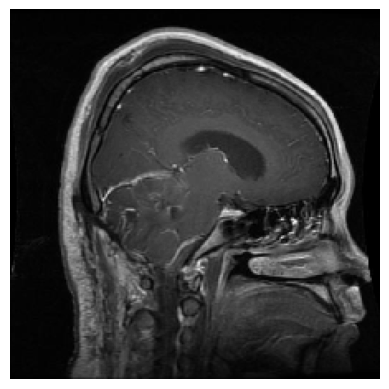

dtype: float32
Arr shape after transform: (224, 224, 1)


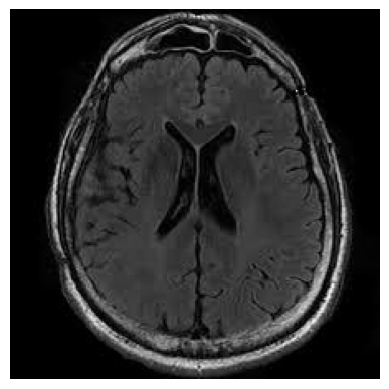

dtype: float32
Arr shape after transform: (224, 224, 1)


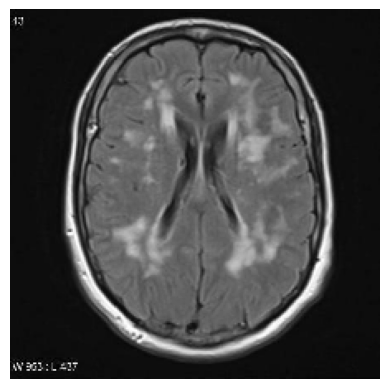

dtype: float32
Arr shape after transform: (224, 224, 1)


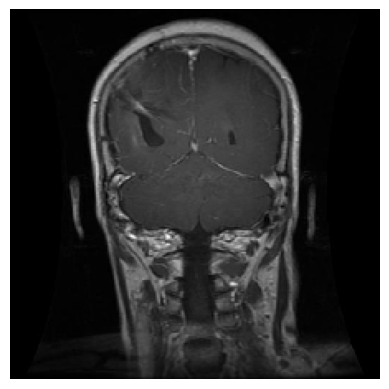

dtype: float32
Arr shape after transform: (224, 224, 1)


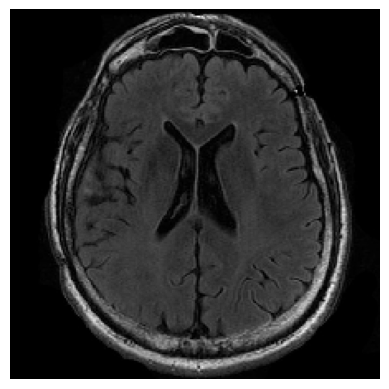

dtype: float32
Arr shape after transform: (224, 224, 1)


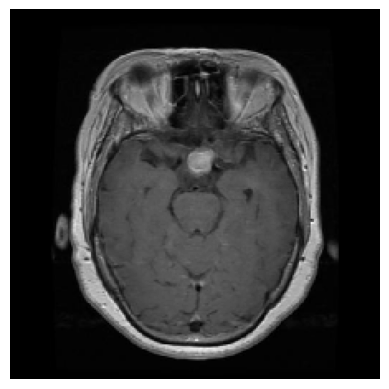

dtype: float32
Arr shape after transform: (224, 224, 1)


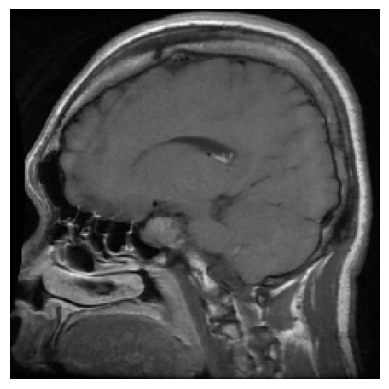

dtype: float32
Arr shape after transform: (224, 224, 1)


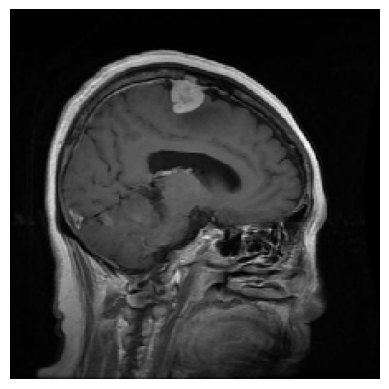

dtype: float32
Arr shape after transform: (224, 224, 1)


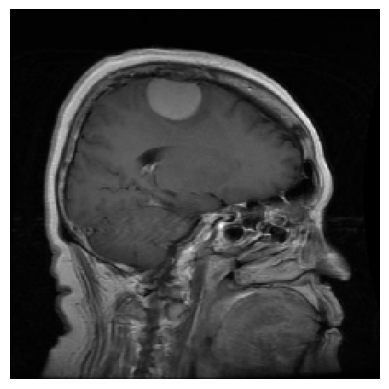

dtype: float32
Arr shape after transform: (224, 224, 1)


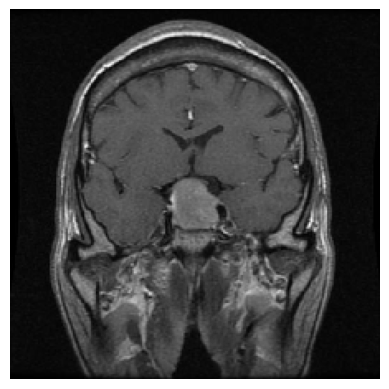

dtype: float32
Arr shape after transform: (224, 224, 1)


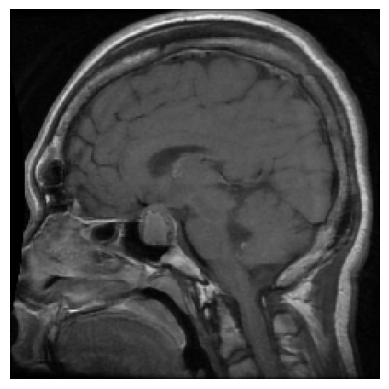

dtype: float32
Arr shape after transform: (224, 224, 1)


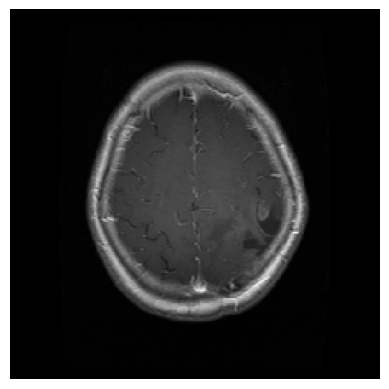

dtype: float32
Arr shape after transform: (224, 224, 1)


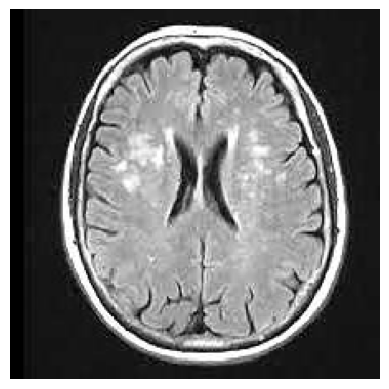

dtype: float32
Arr shape after transform: (224, 224, 1)


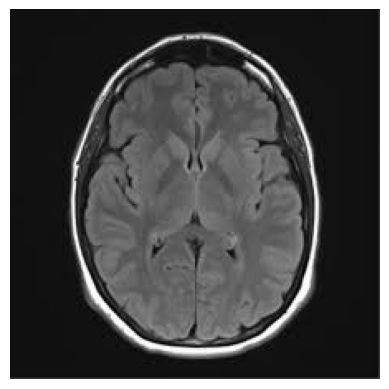

dtype: float32
Arr shape after transform: (224, 224, 1)


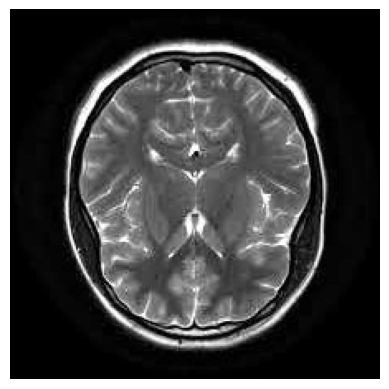

dtype: float32
Arr shape after transform: (224, 224, 1)


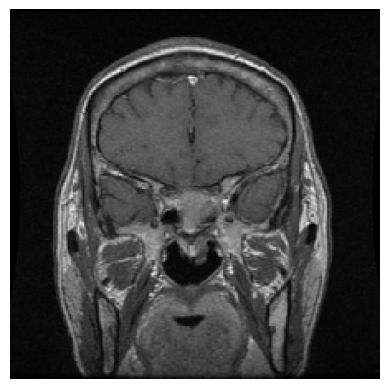

dtype: float32
Arr shape after transform: (224, 224, 1)


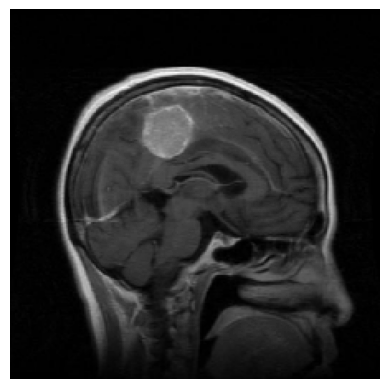

dtype: float32
Arr shape after transform: (224, 224, 1)


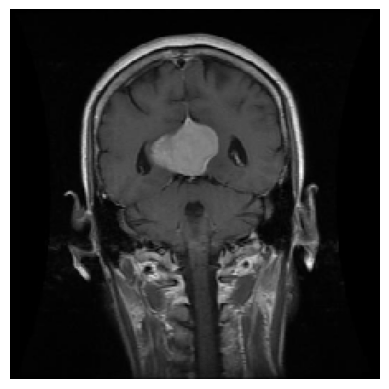

dtype: float32
Arr shape after transform: (224, 224, 1)


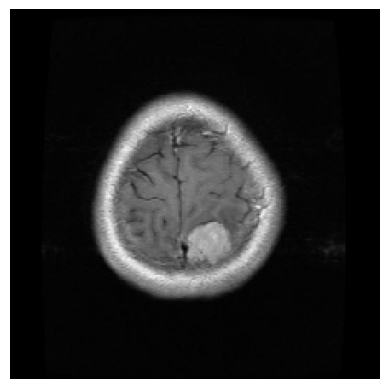

dtype: float32
Arr shape after transform: (224, 224, 1)


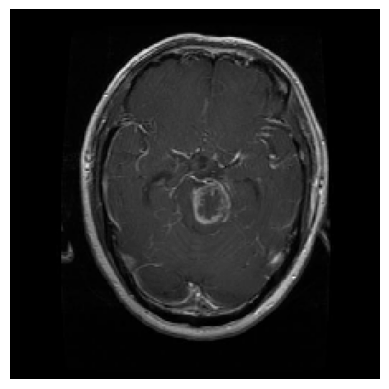

dtype: float32
Arr shape after transform: (224, 224, 1)


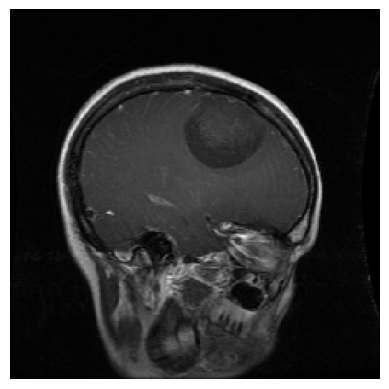

dtype: float32
Arr shape after transform: (224, 224, 1)


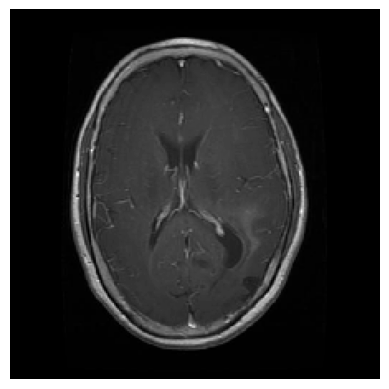

dtype: float32
Arr shape after transform: (224, 224, 1)


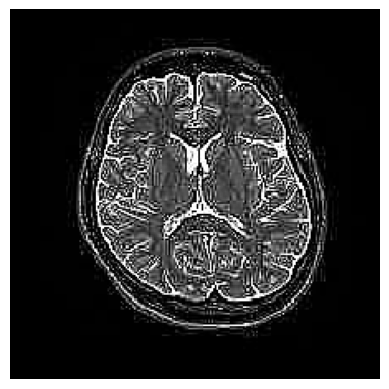

dtype: float32
Arr shape after transform: (224, 224, 1)


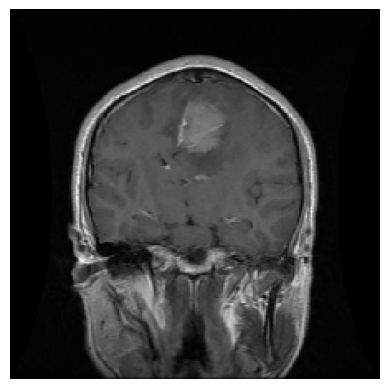

dtype: float32
Arr shape after transform: (224, 224, 1)


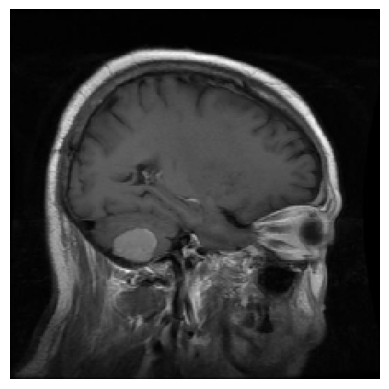

dtype: float32
Arr shape after transform: (224, 224, 1)


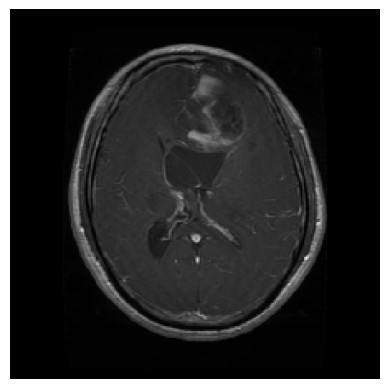

dtype: float32
Arr shape after transform: (224, 224, 1)


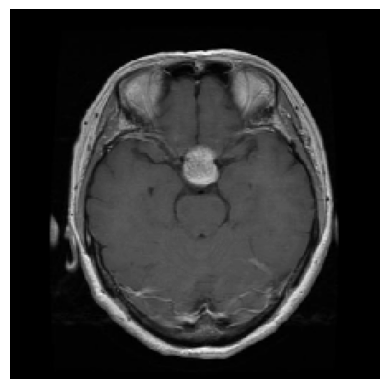

dtype: float32
Arr shape after transform: (224, 224, 1)


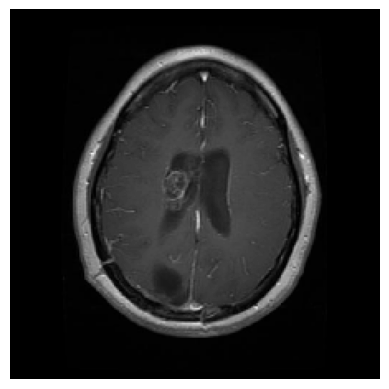

dtype: float32
Arr shape after transform: (224, 224, 1)


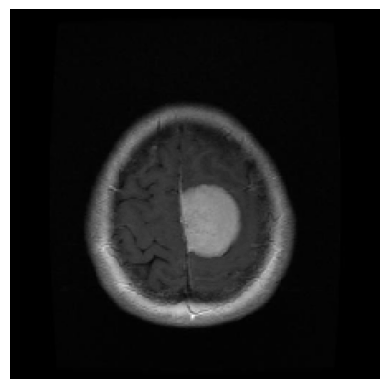

dtype: float32
Arr shape after transform: (224, 224, 1)


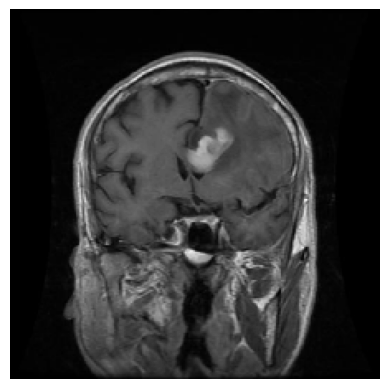

dtype: float32
Arr shape after transform: (224, 224, 1)


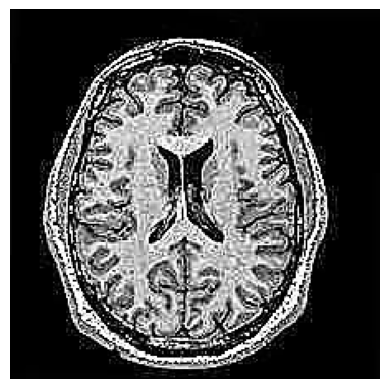

In [25]:
for images, labels in train_img_dataset.take(1):  # takes 1 batch out of tf dataset train_img_dataset
    for i in range(len(images)):    # range(len(images)) is size of 1 batch - 32
        #print(f'Shape before transform: {images[i].shape}')
        tf_labels = labels
        img = images[i]
        arr = img_to_array(img).astype('float32') #/ 255. #normalize values to between 0 and 1
        #std_img = (arr - np.min(arr)) / (np.max(arr) - np.min(arr)) #standardize so tissues in diff images are similar intensities
        print(f'dtype: {arr.dtype}')
        print(f'Arr shape after transform: {arr.shape}')
        plt.imshow(arr, cmap='gray')
        plt.axis('off')
        plt.show()

In [ ]:
# plot original images (count 5) in RGB channels separately with tf dataset batch
tf_im = images[29]

fig, (im1, im2, im3, im4) = plt.subplots(1, 4, sharey=True)
fig.set_figwidth(20) 
im1.imshow(tf_im)  # original image
im2.imshow(tf_im[:, : , 0]) # red
im3.imshow(tf_im[:, : , 1]) # green
im4.imshow(tf_im[:, : , 2]) # blue
fig.suptitle('Original and RGB image channels')
format_and_render_plot()

In [ ]:
iterator = train_img_dataset.make_initializable_iterator()
#iterator = dataset.make_initializable_iterator()

iter_next = iterator.get_next()

# images, labels = iterator.get_next()

In [ ]:
ds_images, ds_labels = train_img_dataset[]
batch_size, image_size[0], image_size[1], num_channels = 

In [ ]:
# cv2.bilateral_filter()

In [ ]:
# images has shape (batch_size, image_size[0], image_size[1], num_channels)

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing((224,224), interpolation='nearest', crop_to_aspect_ratio=True),
    layers.Rescaling(scale=1./255)])

data_augmentation = tf.keras.Sequential([layers.RandomFlip("horizontal_and_vertical"), layers.RandomRotation(0.1),
                                         layers.RandomZoom(0.1)])
        
normalizer = layers.Normalization()
normalizer.adapt(x_train)

cv2.resize(img,(int(img.shape[1]*factor), int(img.shape[0]*factor)))
cv2.bilateral_filter()

In [ ]:
model = tf.keras.Sequential([
  # Add the preprocessing layers you created earlier.
  resize_and_rescale,
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D()])
  # Rest of your model.])

In [ ]:
model = tf.keras.Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)])

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=5
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

In [ ]:
loss, acc = model.evaluate(test_ds)
print("Accuracy", acc)

In [ ]:
image, label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

In [ ]:
# remake using keras.layers for normalizing and preprocessing
# rescaler = tf.keras.layers.Rescaling(scale=1./255., offset=0.0)
# OR  normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
# std_image = (gray_image - np.min(gray_image)) / (np.max(gray_image) - np.min(gray_image))
# normalizer = tf.keras.layers.Normalization()
# data augmentation -- resizer = tf.keras.layers.Resizing(height, width, interpolation='bilinear', crop_to_aspect_ratio=False)
# normalization tf.keras.utils.normalize(x, axis=-1, order=2)

Reduced number of channels to 1 for grayscale and moved on

Thresholding for mask using Otsu's method and opencv

In [ ]:
# threshold_otsu still not segmenting brain -- apply mask first

In [474]:
# use masks - crop neck? 
im = img_to_array(images[17]*255)
#print(im)

im_filt = ndi.gaussian_filter(im, sigma=1)
#print(im_filt)
mask_start = np.where(im_filt>10, 1, 0)
#dilate = ndi.binary_dilation(mask_start)
mask = ndi.binary_closing(mask_start)
im_mask = np.where(mask, im, 0)

labels, nlabels = ndi.label(mask)
print(f'Num labels: {nlabels}')

[[[1.1983569e+00]
  [1.1979642e+00]
  [1.1919302e+00]
  ...
  [1.1979642e+00]
  [1.1983575e+00]
  [1.1983777e+00]]

 [[1.4931722e+01]
  [1.4926828e+01]
  [1.4851644e+01]
  ...
  [1.4926828e+01]
  [1.4931729e+01]
  [1.4931981e+01]]

 [[7.6633331e+01]
  [7.6608223e+01]
  [7.6222351e+01]
  ...
  [7.6608223e+01]
  [7.6633369e+01]
  [7.6634666e+01]]

 ...

 [[1.4931989e+01]
  [1.4931989e+01]
  [1.4931989e+01]
  ...
  [1.0822250e+01]
  [1.4083782e+01]
  [1.4839128e+01]]

 [[1.1642516e+00]
  [1.1642516e+00]
  [1.1642516e+00]
  ...
  [8.2870394e-01]
  [1.0964385e+00]
  [1.1576288e+00]]

 [[3.4126811e-02]
  [3.4126811e-02]
  [3.4126811e-02]
  ...
  [2.3994152e-02]
  [3.2079037e-02]
  [3.3926822e-02]]]
Num labels: 0


In [ ]:
plt.imshow(im_mask)

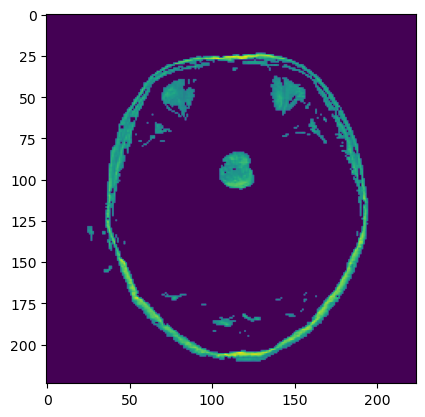

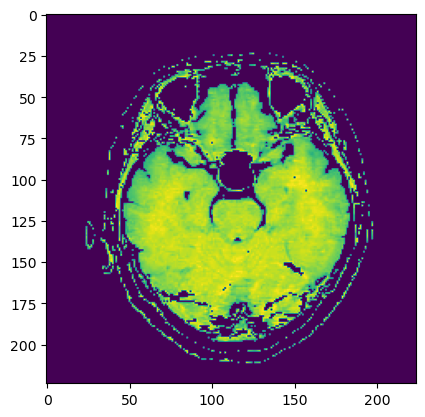

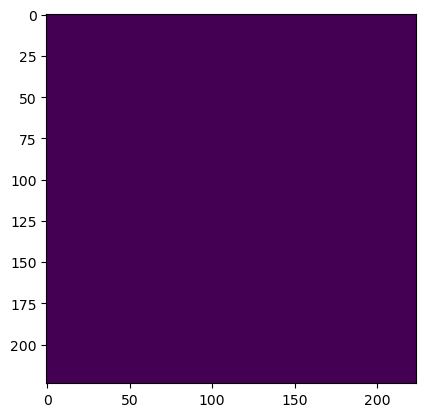

In [496]:
# 3 channel color

#im = imageio.imread(train_paths_unshuffled[900])
#im = im.astype('float32')
im = img_to_array(images[27])

#im_arr = img_to_array(im)
mask_bone = im>=110
im_bone = np.where(mask_bone, im, 0)
plt.imshow(im_bone)
plt.show()

mask_brain = (im>55) & (im<90)
im_brain = np.where(mask_brain, im, 0)
plt.imshow(im_brain)
plt.show()

mask_dilate = ndi.binary_dilation(mask_brain, iterations=10)
mask_closed = ndi.binary_closing(mask_dilate, iterations=20)
im_closed = np.where(mask_closed, im, 0)
plt.imshow(im_closed)
plt.show()

#fig, axes = plt.subplots(1, 2)
#axes[0].imshow(im_closed)
#axes[1].imshow(mask_dilate, cmap='gray')
#axes[0].imshow(mask_closed, cmap='gray')
#format_and_render_plot()

# plot keeps saying dtype not supported

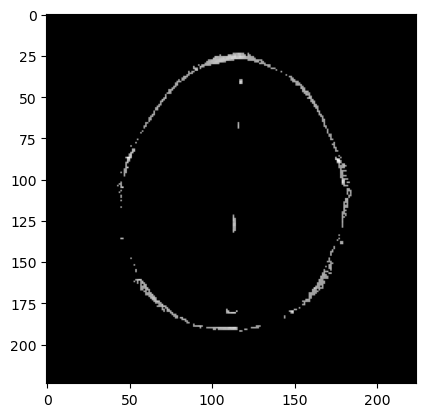

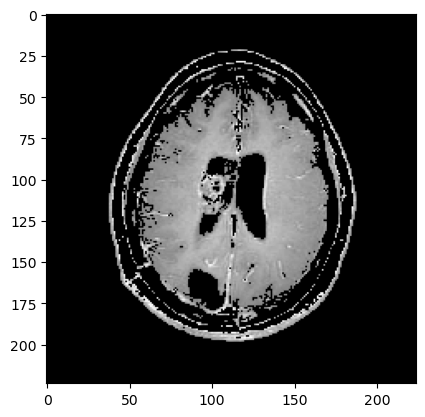

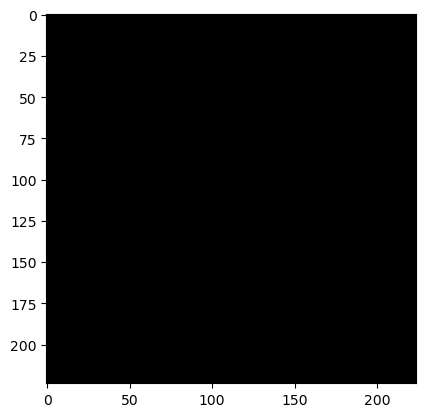

In [494]:
# grayscale from tf dataset batch
        # normalize images help?

im = images[28]

#im_arr = img_to_array(im)
mask_bone = im>=150
im_bone = np.where(mask_bone, im, 0)
plt.imshow(im_bone, cmap='gray')
plt.show()

mask_brain = (im>50) & (im<100)
im_brain = np.where(mask_brain, im, 0)
plt.imshow(im_brain, cmap='gray')
plt.show()

mask_dilate = ndi.binary_dilation(mask_bone, iterations=10)
mask_closed = ndi.binary_closing(mask_dilate, iterations=20)
im_closed = np.where(mask_closed, im, 0)
plt.imshow(im_closed, cmap='gray')
plt.show()

# plot keeps saying dtype not supported

Mask attempt worked much better after converted to grayscale

**Thresholding**

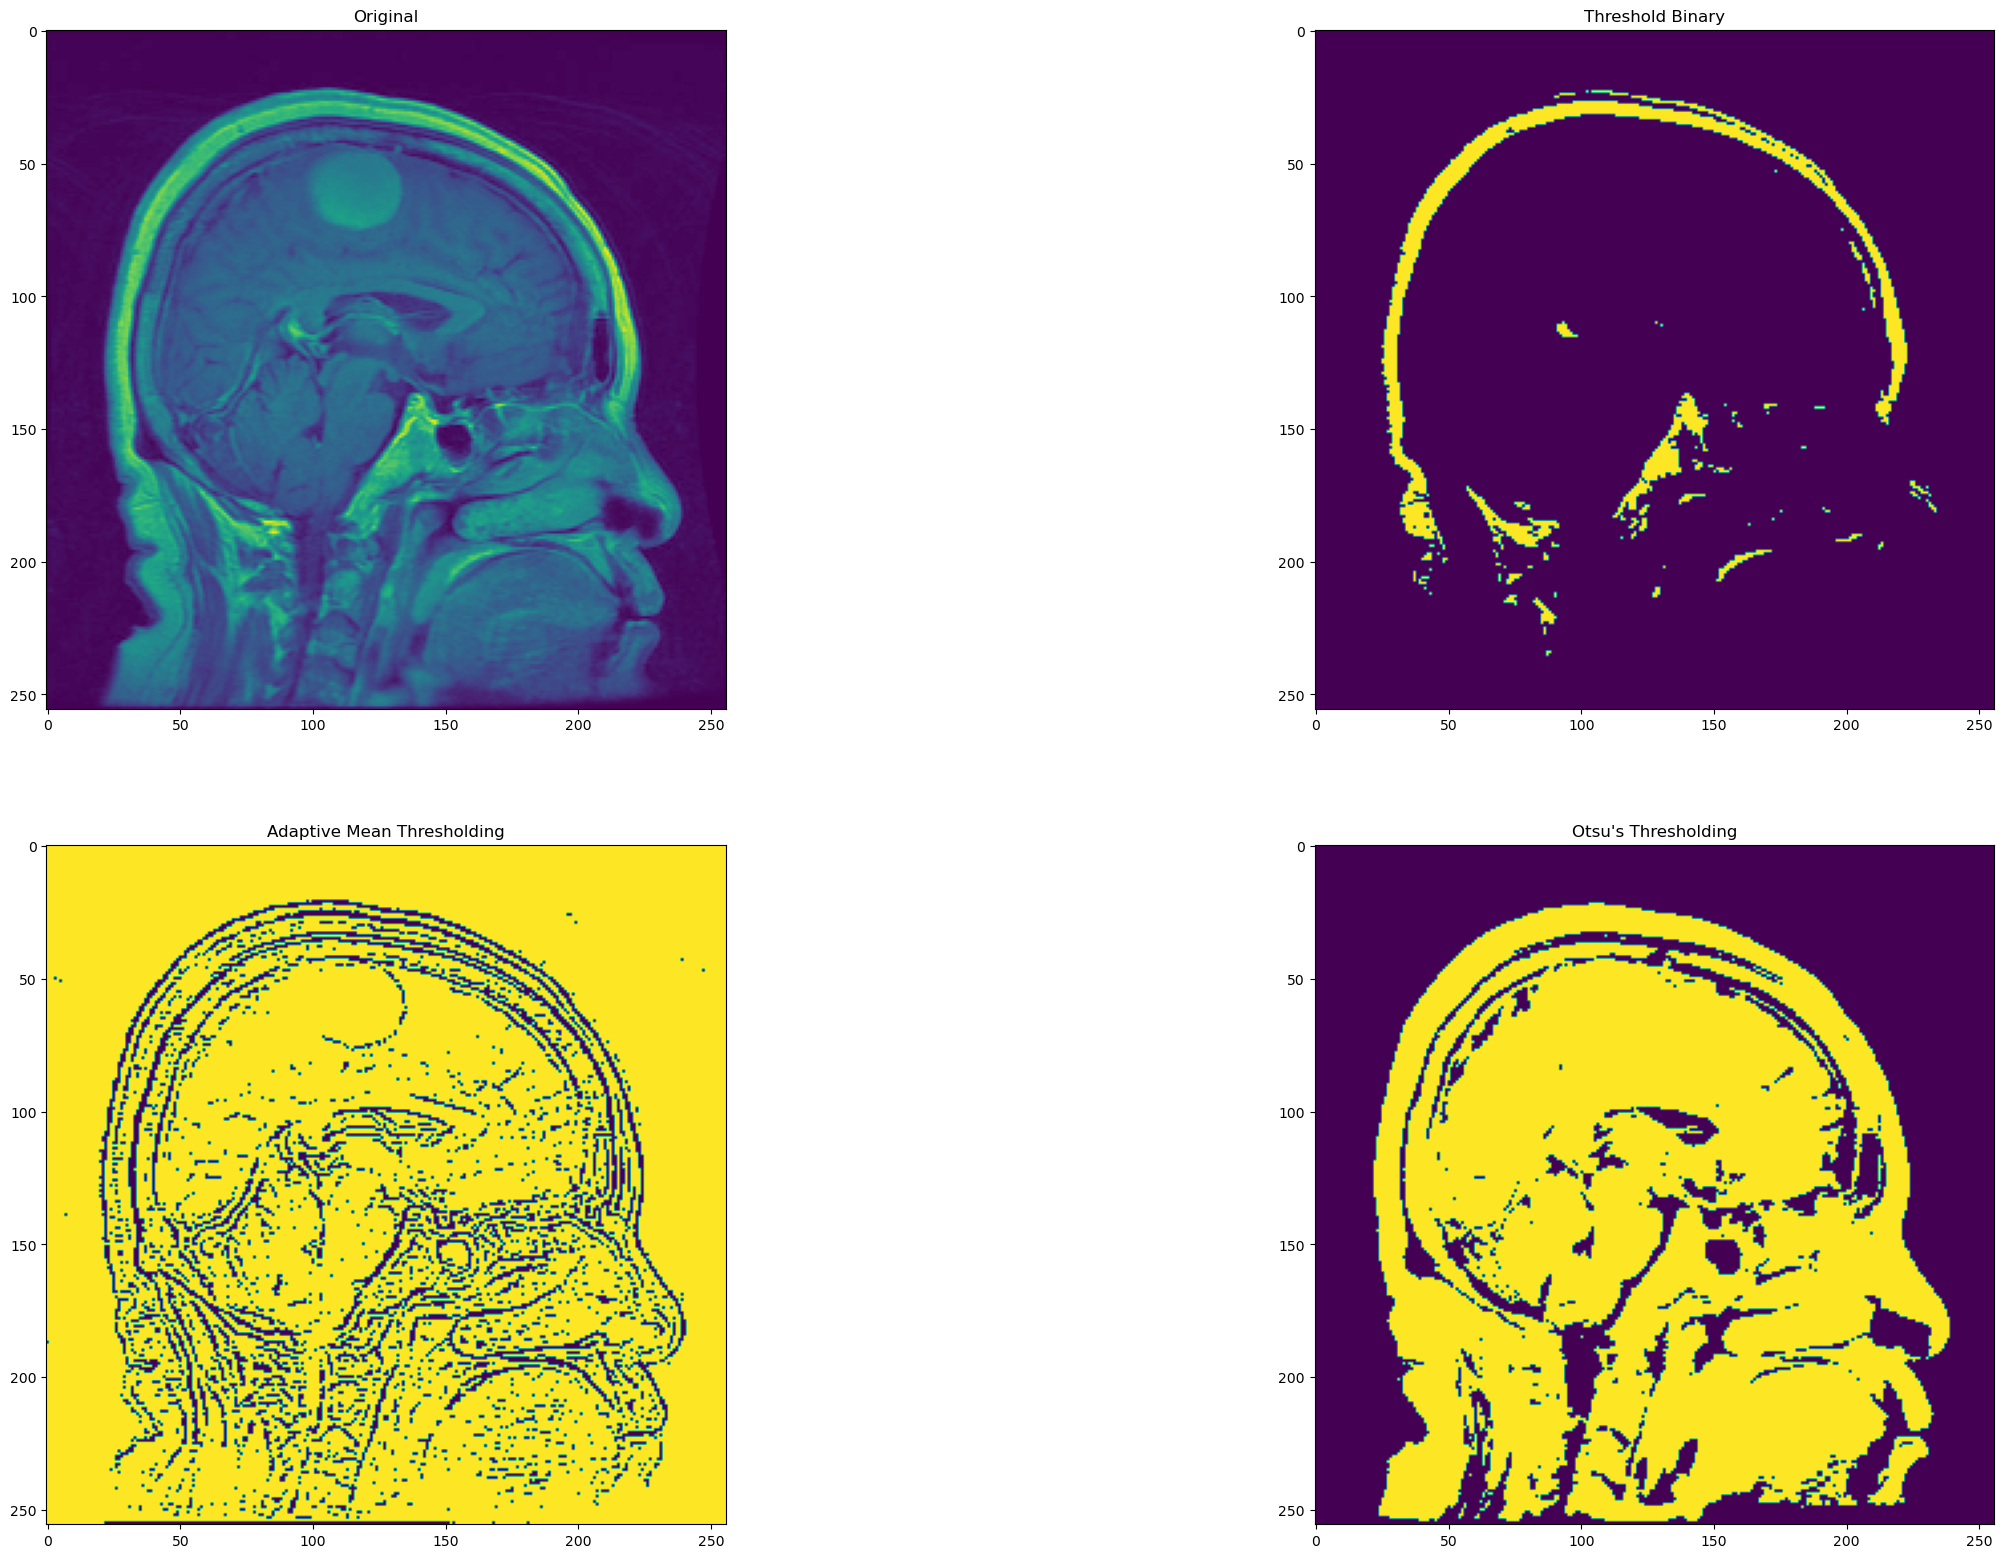

In [444]:
# work with cv2.threshold

image = img_to_array(images[17], dtype='uint8')
plt.figure(figsize=(30, 30))
plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(image)
ret,thresh1 = cv2.threshold(image, 140, 255, cv2.THRESH_BINARY)
plt.subplot(3, 2, 2)
plt.title("Threshold Binary")
plt.imshow(thresh1)
#image = cv2.GaussianBlur(image, (3, 3), 0)
thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5) 
plt.subplot(3, 2, 3)
plt.title("Adaptive Mean Thresholding")
plt.imshow(thresh)
_, th2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.subplot(3, 2, 4)
plt.title("Otsu's Thresholding")
plt.imshow(th2)
format_and_render_plot()

dimension: (256, 256, 1)


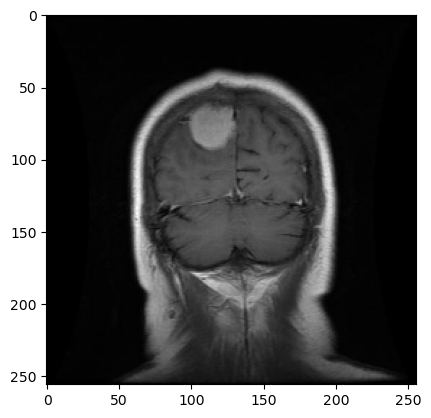

Threshold:  51.29883


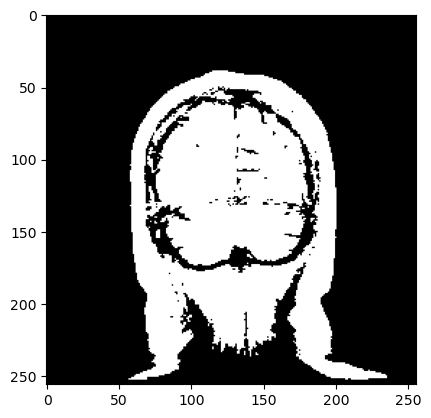

In [404]:
# source image needs to be grayscale and then check histograms again for bimodal distributions

from skimage.filters  import threshold_otsu
from skimage import measure
# import image reading module image from matplotlib
import matplotlib.image as img
#import image ploting module pyplot from matplotlib 
import matplotlib.pyplot as plt


inim = images[17]
inim = img_to_array(inim)
#Find the dimension of the input image
dimn = inim.shape
print('dimension:',dimn)
plt.figure(1)
plt.imshow(inim, cmap='gray')
plt.show()
#-----------------------------------------------
# Find a threshold for the image using Otsu method in filters
th = threshold_otsu(inim)
print('Threshold: ',th)
# Binarize using threshold th
binim1 = inim > th
plt.figure(2)
plt.imshow(binim1, cmap='gray')
plt.show()

# can use to crop and resize

In [ ]:
# plot images from resized and normalized array
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(20,20))
fig1, axes1 = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
for i in range(10):
    arr = train_img_array*255
    PIL_image = Image.fromarray(arr[i*230])
    axes[i].imshow(PIL_image, cmap='gray')
    axes[i].axis('off')
    hist = ndi.histogram(PIL_image, min=0, max=255, bins=256)
    cdf = hist.cumsum() / hist.sum()
    axes1[0].plot(hist, label=['Histogram', i])
    axes1[1].plot(cdf, label=['CDF', i])
format_and_render_plot()

After some preprocessing, images hist appears more uniform

In [1]:
# images tend to be bimodal histograms with roughly similar distributions
images = train_img_dataset.take(1)
hist = ndi.histogram(images*255, min=0, max=255, bins=256)
cdf = hist.cumsum() / hist.sum()

fig, axes = plt.subplots(2, 1, figsize=(10,10))
axes[0].plot(hist, label='Histogram')
axes[1].plot(cdf, label='CDF')
axes[0].axvline(x=10, color='r')
format_and_render_plot()

NameError: name 'train_img_dataset' is not defined

In [ ]:
# distributions of different image groupings
hist1 = ndi.histogram(train_img_array[0:30]*255, min=0, max=255, bins=256)
cdf1 = hist1.cumsum() / hist1.sum()

hist2 = ndi.histogram(train_img_array[400:500]*255, min=0, max=255, bins=256)
cdf2 = hist2.cumsum() / hist2.sum()

fig, axes = plt.subplots(1,2, figsize=(20,10))
axes[0].plot(hist1, label='Histogram')
axes[0].axvline(x=10, color='r')
axes[1].plot(cdf1, label='CDF')
format_and_render_plot()

# wider view, different subset of images
fig1, axes1 = plt.subplots(2, 1, figsize=(10,10))
axes1[0].plot(hist2, label='Histogram')
axes1[0].axvline(x=10, color='r')
axes1[1].plot(cdf2, label='CDF')
format_and_render_plot()

In [ ]:
# load and transform train and test images
def load_train_image(input_image):
    image = normalize(input_image)
    image = resize_image(image)
    image = convert_grayscale(image)
    return image

In [ ]:
# augment images to train on or validate on

# enhance images - brightness, contrast

In [ ]:
# build basic model

In [ ]:
# utilize pre-made model